**Nome:** Iran Freitas Ribeiro

**Matrícula:** 20212021241588

**Disciplina:** TEI - Estatística Aplicada

**Professor:** Celso José Munaro

In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from IPython.display import Markdown as md

A variável uniforme utilizada nas questões 1, 2, 3, 4 é definida a seguir

**$1.$ Considerando que $N=20$ amostras de $X$ são selecionadas para calcular a média $\bar{X}$, plote a pdf de $\bar{X}$**

In [2]:
np.random.seed(42)
a, b = [1.0, 3.0]
X = np.random.uniform(low=a, high=b, size=1000)
X_sample = np.random.choice(X, size=20)
# desvio padrão da amostra
std_a = np.std(X)/np.sqrt(20)
std_a

0.13058245977725402

In [3]:
xis = np.linspace(1.0,3.0,20)
pdf = [norm.pdf(xi, loc=np.mean(X_sample), scale=std_a) for xi in xis]

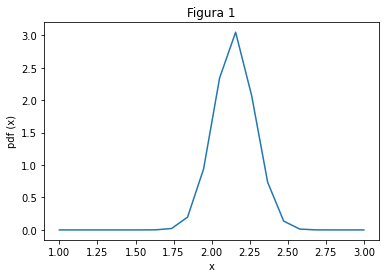

In [4]:
plt.plot(xis, pdf)
plt.title("Figura 1")
plt.xlabel("x")
plt.ylabel("pdf (x)");

**$2.$ Usando a pdf do item $1$, escolha um nível de confiança ($1$ − $\alpha$) para delimitar as regiões de aceitação e regiões críticas, mostrando-as no gráfico da pdf de $\bar{X}$**

O nível de confiança utilizado será de $97\%$, ou seja, $\alpha=0.03$

In [6]:
def CI(muX, sigma, n, alpha=0.05):
    """
    Calcula o intervalo de confiância de uma distribuição normal
    """
    # percentage point da distribuição normal
    # essa parte é ligeiramente diferente da definição,
    # pois zalpha_2 retorna um valor negativo
    zalpha_2  = norm.ppf(alpha/2)
    # limite superior
    ci_d = muX - zalpha_2*sigma/np.sqrt(n)
    # limite inferior
    ci_l = muX + zalpha_2*sigma/np.sqrt(n)
    return ci_l, ci_d

In [7]:
ci = CI(muX=np.mean(X_sample), sigma=np.std(X), alpha=0.03, n=20)
ci

(1.8645124830445754, 2.4312639619324594)

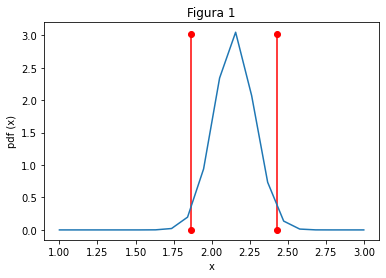

In [8]:
fig, ax = plt.subplots()

lim_inf, lim_sup = [np.min(pdf), np.max(pdf)]
one_x12, one_y12 = [ci[0], ci[0]], [lim_inf, lim_sup-0.02]
two_x12, two_y12 = [ci[1], ci[1]], [lim_inf, lim_sup-0.02]
ax.plot(one_x12, one_y12, two_x12, two_y12, marker = 'o', color='red')
ax.plot(xis, pdf)
ax.set_title("Figura 1")
ax.set_xlabel("x")
ax.set_ylabel("pdf (x)");

**$3.$ Usando as definições da atividade $2$, sugira um teste de hipótese para a média de modo que se tenha probabilidade de erro tipo I igual a $\alpha$ e probabilidade de erro tipo II $\beta = 0.1$. Repita para $\beta = 0.5$**

In [9]:
muS = np.mean(X_sample)
muS

2.1478882224885174

$H_0: \mu=1.99$

$H_1: \mu \neq 1.99$

In [12]:
z1 = (ci[0]-muS)/std_a
z2 = (ci[1]-muS)/std_a
z1,z2

(-2.1700903775845615, 2.1700903775845615)

In [10]:
# pz do limite inferior p/ que o alpha seja igual a 0.03 (0.015 de um lado e de outro)
pz = norm.ppf(0.015)
pz

-2.1700903775845606

In [11]:
novo_ci = [0,0]
novoZ = -2.17
novo_ci[0] = novoZ*std_a+np.mean(X_sample).round(2)
novo_ci[1] = -novoZ*std_a+np.mean(X_sample).round(2)
novo_ci

md(f"Para que a probabilidade do Erro tipo I seja igual a alpha (valor definido para intervalo de confiança), $\mu < {novo_ci[0].round(2)}$ e $\mu > {novo_ci[1].round(2)}$")

Para que a probabilidade do Erro tipo I seja igual a alpha (valor definido para intervalo de confiança), $\mu < 1.87$ e $\mu > 2.43$

Para obter $\beta = 0.1$

In [12]:
muXb = 2.43

In [13]:
# TODO: REFAZER ESSA PARTE VENDO NO GRÁFICO
ci_b = CI(muX=muXb, sigma=std_a, alpha=0.03, n=20)
ci_b

(2.366635258342908, 2.4933647416570923)

$\beta = P(2.99 \le \bar{X} \le 3.54)$, quando $\mu = 3.26$

In [62]:
z3 = (ci_b[0]-muXb)/std_a
z4 = (ci_b[1]-muXb)/std_a
z3, z4

(-0.40806562540033636, 0.5624282949191157)

In [15]:
pz_beta = norm.ppf(0.1)
pz_beta

-1.2815515655446004

In [16]:
novo_ci_b1 = [0,0]
novoZ_b1 = pz_beta
novo_ci_b1[0] = novoZ_b1*std_a + muXb
novo_ci_b1[1] = -novoZ_b1*std_a + muXb
novo_ci_b1

[2.2626518442397954, 2.597348155760205]

Para que a probabilidade do Erro tipo II seja igual a $0.1$, $2.14 \leq \bar{X} \leq 2.47$, quando $\mu=2.32$

In [17]:
pdf_2 = [norm.pdf(xi, loc=muXb, scale=std_a) for xi in xis]

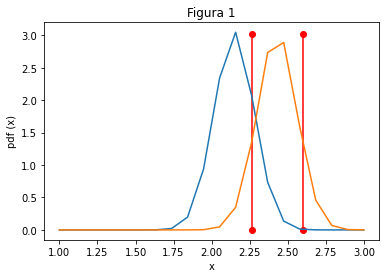

In [18]:
fig, ax = plt.subplots()

lim_inf, lim_sup = [np.min(pdf), np.max(pdf)]
one_x12, one_y12 = [novo_ci_b1[0], novo_ci_b1[0]], [lim_inf, lim_sup-0.02]
two_x12, two_y12 = [novo_ci_b1[1], novo_ci_b1[1]], [lim_inf, lim_sup-0.02]
ax.plot(one_x12, one_y12, two_x12, two_y12, marker = 'o', color='red')
ax.plot(xis, pdf)
ax.plot(xis, pdf_2)
ax.set_title("Figura 1")
ax.set_xlabel("x")
ax.set_ylabel("pdf (x)");

Uma alternativa para aumentar o Erro II é diminuir o Erro I. Isso pode ser feito ajustando a região de aceitação.

2.1478882224885174

In [90]:
# pz do limite inferior p/ que o alpha seja igual a 0.03 (0.015 de um lado e de outro)
pz_a2 = norm.ppf(0.015)
novo_ci2 = [0,0]
novoZ2 = pz_a2
novo_ci2[0] = novoZ2*std_a+np.mean(X_sample).round(2)
novo_ci2[1] = -novoZ2*std_a+np.mean(X_sample).round(2)
novo_ci2

[1.866624260556058, 2.433375739443942]

In [91]:
pz_a2

-2.1700903775845606

In [39]:
pz_a2

-3.090232306167813

In [44]:
muS

2.1478882224885174

In [97]:
# novo_alpha=0.5
# novo_n = 900
# novo_stda = np.std(X)/np.sqrt(novo_n)
possiveis_mu = np.linspace(2.46,2.59,100)
for pmu in possiveis_mu:
    rg_b2 = CI(muX=pmu, sigma=std_a, alpha=0.03, n=20)
    z1 = (rg_b2[0]-novo_ci2[1])/std_a
    pbeta = norm.cdf(z1)
    if (np.isclose([0.5], [np.round(pbeta,3)])):
        print(pmu)
        break

2.4967676767676767


In [101]:
pmu

2.4967676767676767

In [72]:
np.isclose([0.5], [0.])

array([ True])

In [21]:
rg_b2

(2.1478882224885174, 2.1487635340876814)

In [87]:
novo_ci2

[1.8462197723101614, 2.4537802276898386]

In [100]:
rg_b2

(2.4334029351105846, 2.560132418424769)

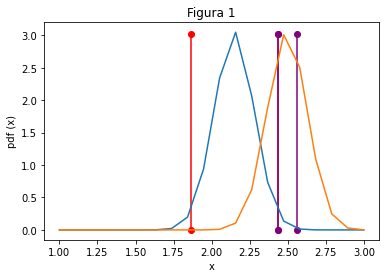

In [102]:
fig, ax = plt.subplots()

lim_inf, lim_sup = [np.min(pdf), np.max(pdf)]

o_x12, o_y12 = [novo_ci2[0], novo_ci2[0]], [lim_inf, lim_sup-0.02]
t_x12, t_y12 = [novo_ci2[1], novo_ci2[1]], [lim_inf, lim_sup-0.02]

one_x12, one_y12 = [rg_b2[0], rg_b2[0]], [lim_inf, lim_sup-0.02]
two_x12, two_y12 = [rg_b2[1], rg_b2[1]], [lim_inf, lim_sup-0.02]
ax.plot(o_x12, o_y12, t_x12, t_y12, marker = 'o', color='red')
ax.plot(one_x12, one_y12, two_x12, two_y12, marker = 'o', color='purple')
ax.plot(xis, pdf)
pdf_2 = [norm.pdf(xi, loc=pmu, scale=std_a) for xi in xis]
ax.plot(xis, pdf_2)
ax.set_title("Figura 1")
ax.set_xlabel("x")
ax.set_ylabel("pdf (x)");

Para que a probabilidade do Erro tipo II seja igual a $0.5$, $-2.17 \leq \bar{X} \leq 2.17$, quando $\mu=2.17$

**$4.$ Altere $N$ para aumentar o poder de teste de $50\%$ para $75\%$ ($\beta = 0.5$ para $\beta = 0.25$). Ilustre a solução graficamente na pdf.**

In [103]:
pmu

2.4967676767676767

In [118]:
for n in range(20,100):
    novo_stda = np.std(X)/np.sqrt(n)
    rg_bn = CI(muX=pmu, sigma=novo_stda, alpha=0.03, n=n)
    z1 = (rg_bn[0]-novo_ci2[1])/novo_stda
    pbeta = norm.cdf(z1)
    if (np.isclose([0.75],[np.round(pbeta,3)])):
        print(n)
        print (pbeta)

73
0.7496761655597068


**$5.$ Sejam os dados $X$ gerados na atividade $1$ do EPC6: cálculo de $50$ médias usando $20$ amostras selecionadas aleatoriamente de $X$. Use o teste z (ztest) para verificar se a variável aleatória 𝑋̅ tem distribuição normal com a média e desvio padrão conhecidos da população $X$. Interprete as saídas do teste: h ($0$ ou $1$), valor-p, CI, zval (estatística de teste), e mostre graficamente estas informações na pdf e complemente com a função normplot**